In [138]:
!pip install ReportLab
!pip install biopython

In [139]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO

In [140]:
import pandas as pd
import requests
from IPython.core.display import Image

In [141]:
#UPLOAD GENOME.GB HERE FROM LOCAL COMPUTER
#RUNNING THIS CELL WILL POP A BUTTON NAMED CHOOSE FILES

from google.colab import files
uploaded = files.upload()

Saving Genome.gb to Genome.gb


In [142]:
record = SeqIO.read("/content/Genome.gb", "genbank")

In [143]:
graphone = GenomeDiagram.Diagram("Genome Graph")
graphone_features = graphone.new_track(1, name="list of features")
graphone_feature_set = graphone_features.new_set()

In [144]:
#First drawing a simple linear graph to see if works
for feature in record.features:
    if feature.type != "gene":
        #Exclude this feature
        continue
    if len(graphone_feature_set) % 2 == 0:
        color = colors.grey
    else:
        color = colors.lightblue
    graphone_feature_set.add_feature(feature, color=color, label=True, label_size = 15)

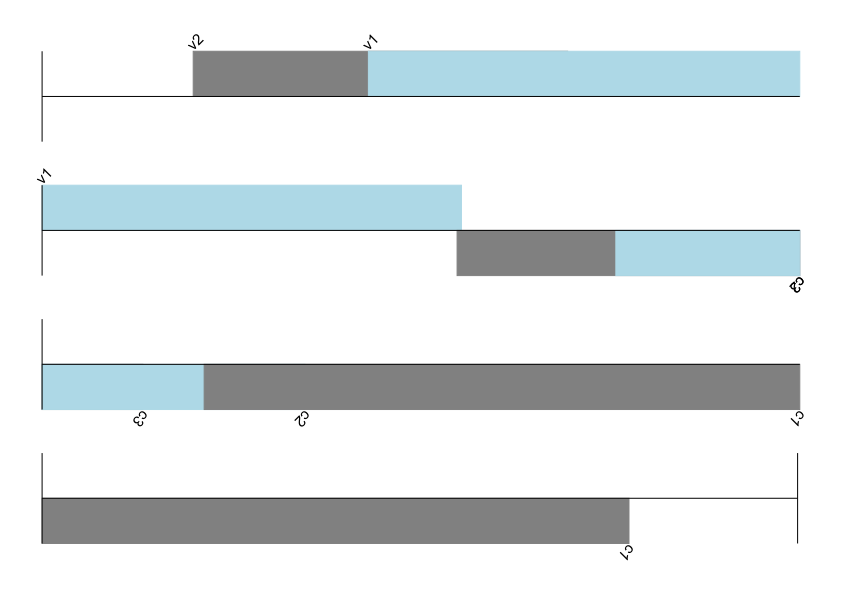

In [145]:
graphone.draw(format="linear", orientation="landscape", pagesize='A4',
                fragments=4, start=0, end=len(record))

graphone.write("/content/linear_graph.png", "png")

Image("/content/linear_graph.png")

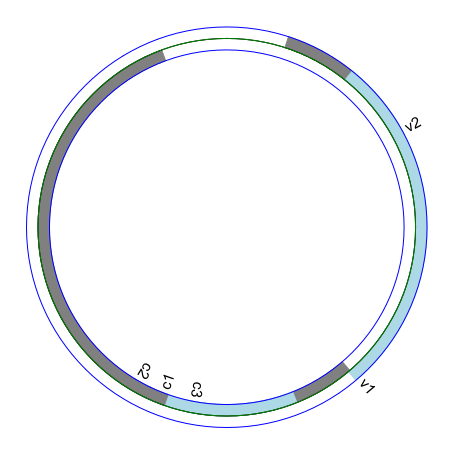

In [146]:
#Simple circular graph
graphone.draw(format="circular", circular=True, pagesize=(16*cm,16*cm),
                start=0, end=len(record), circle_core=0.85, tracklines = 1)
graphone.write("/content/circular_graph.png", "PNG")
Image("/content/circular_graph.png")

In [151]:
from Bio.SeqFeature import SeqFeature, FeatureLocation

record = SeqIO.read("/content/Genome.gb", "genbank")

graphone = GenomeDiagram.Diagram(record.id)
gd_track_for_features = graphone.new_track(1, name="Annotated Features")
graphone_feature_set = gd_track_for_features.new_set()

#Getting each feature from the genBank file to be plotted
for feature in record.features:
    if feature.type != "gene":
        #Exclude this feature bc only want genes
        continue
    if len(graphone_feature_set) % 2 == 0:
        color = colors.fidlightblue
    else:
        color = colors.lightsalmon
    graphone_feature_set.add_feature(feature,
                               color=color, label=True, label_size = 14, label_angle=0)

#To include a couple popular strandless features, like EcoRI recognition sites 
for site, name, color in [("GAATTC","EcoRI",colors.indianred),
                          ("CCCGGG","SmaI",colors.blue),
                          ("AAGCTT","HindIII",colors.green),
                          ("GGATCC","BamHI",colors.grey)]:
    index = 0
    while True:
        index  = record.seq.find(site, start=index)
        if index == -1 : break 
        #Getting labels with corresponding plotted area and plotting
        feature = SeqFeature(FeatureLocation(index, index+len(site)))
        graphone_feature_set.add_feature(feature, color=color, name=name,
                                   label=True, label_size = 13, label_color=color)
        index += len(site)

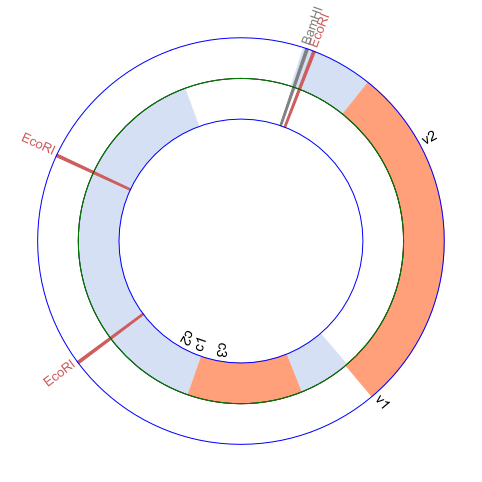

In [152]:
#Drawing the Final cicular genome with features and labels

graphone.draw(format="circular", circular=True, pagesize=(17*cm,17*cm),
                start=0, end=len(record), circle_core = 0.5, tracklines = 2)
graphone.write("/content/circular_detailed.png", "png")

Image("/content/circular_detailed.png")
